In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=58000,
                    mu=0.15,
                    sigma=0.69,
                    deltaT=2,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

In [67]:
b = Brownian()

[ 0.   0.1  0.  -0.1  0.   0.1  0.2  0.1  0.   0.1  0.   0.1  0.2  0.1
  0.  -0.1  0.  -0.1  0.  -0.1 -0.2 -0.3 -0.4 -0.3 -0.4 -0.5 -0.6 -0.5
 -0.6 -0.7 -0.8 -0.9 -1.  -0.9 -0.8 -0.9 -1.  -1.1 -1.  -1.1 -1.  -1.1
 -1.  -0.9 -1.  -1.1 -1.2 -1.3 -1.2 -1.1 -1.2 -1.1 -1.  -1.1 -1.  -1.1
 -1.  -0.9 -1.  -0.9 -1.  -1.1 -1.2 -1.3 -1.4 -1.3 -1.4 -1.3 -1.4 -1.3
 -1.2 -1.3 -1.2 -1.1 -1.2 -1.1 -1.  -1.1 -1.2 -1.1 -1.  -1.1 -1.  -0.9
 -1.  -1.1 -1.2 -1.3 -1.2 -1.3 -1.4 -1.3 -1.4 -1.3 -1.2 -1.3 -1.4 -1.5
 -1.4 -1.5]
[0.  0.1 0.  0.1 0.2 0.1 0.2 0.3 0.2 0.3 0.4 0.5 0.6 0.5 0.6 0.7 0.8 0.9
 0.8 0.9 0.8 0.9 1.  1.1 1.  0.9 0.8 0.7 0.6 0.5 0.6 0.5 0.4 0.5 0.6 0.7
 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.4 1.5 1.6 1.7 1.6 1.7 1.6 1.5
 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.3 2.2 2.1 2.2 2.3 2.2 2.1 2.2 2.1
 2.2 2.1 2.  2.1 2.  1.9 1.8 1.9 2.  2.1 2.  1.9 2.  1.9 1.8 1.7 1.8 1.9
 1.8 1.9 2.  1.9 2.  2.1 2.2 2.3 2.4 2.5]
[ 0.00000000e+00 -1.00000000e-01  0.00000000e+00 -1.00000000e-01
  0.00000000e+00 -1

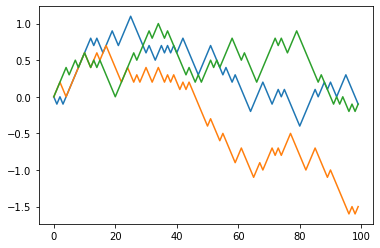

In [72]:
for i in range(3):
    plt.plot(b.gen_random_walk(100))
    print(b.gen_random_walk(100))
plt.show()

In [95]:
b = Brownian(58000)


[58000.         57999.99152194 57999.97009993 58000.02091239
 58000.02571059 57999.95975494 57999.99831247 58000.01098888
 58000.02968317 57999.98271662 58000.03021336 58000.0680522
 58000.06128007 58000.07201771 58000.07092844 58000.10813112
 58000.12540791 58000.08570139 58000.04430053 58000.03021457
 58000.03620509 58000.01288447 58000.03956674 58000.02041499
 58000.01849305 58000.03143658 58000.07208983 58000.0524003
 58000.08459839 58000.11244794 58000.11392805 58000.05643602
 58000.03082697 58000.05850398 58000.07145569 58000.06776782
 58000.02858978 58000.13312595 58000.13236319 58000.07681779
 58000.11884313 58000.13489463 58000.10749177 58000.03662994
 58000.01571539 57999.99447046 58000.00129214 57999.99192149
 58000.00714476 58000.03338043 58000.01057962 58000.0505481
 58000.06791048 58000.0288581  57999.96628176 57999.98910782
 57999.97142855 57999.93236674 57999.94567094 57999.92673379
 57999.93810458 57999.91851851 57999.86293289 57999.82636902
 57999.84866978 57999.87634

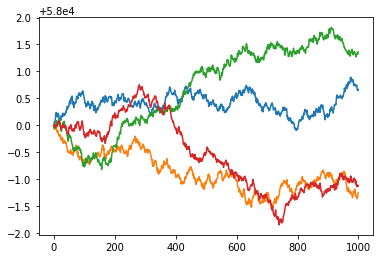

In [98]:
for i in range(4):
    plt.plot(b.gen_normal(1000))
    print(b.gen_normal(1000))
plt.show()

In [92]:
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('BTC.csv')
net = np.array(df['Close'])
rets = net[:30]
rets

array([61663.99, 61653.9 , 61617.7 , 61528.18, 61564.77, 61472.2 ,
       61471.12, 61454.09, 61436.75, 61496.48, 61474.88, 61448.1 ,
       61418.82, 61445.34, 61385.64, 61322.08, 61291.89, 61317.69,
       61344.11, 61379.99, 61398.99, 61487.79, 61567.21, 61615.6 ,
       61629.99, 61647.15, 61636.34, 61603.29, 61541.18, 61548.34])

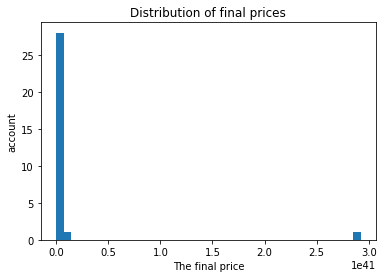

In [94]:
np.random.seed(25)
rets= rets*0.04/np.sqrt(5)
# np.random.randn(100000,5)*0.04/np.sqrt(5)
rets.shape
traces=np.cumprod(1+rets,0)*100
plt.hist(traces[:],bins=40)
plt.title('Distribution of final prices')
plt.xlabel('The final price')
plt.ylabel('account')
plt.savefig('hist.png')

In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
mu = 0.001
sigma = 0.01
start_price = 58000

In [101]:
np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=100)
price = start_price*(1+returns).cumprod()

In [102]:
price

array([59081.15036066, 59376.64899298, 60017.16745935, 61422.10525076,
       62630.62079034, 62081.17620812, 62733.08344894, 62700.86548861,
       62698.84724067, 63018.98661542, 63172.78040086, 64154.65819024,
       64707.0539997 , 64850.49337233, 65203.19136203, 65485.9608636 ,
       66529.85886158, 66459.89721712, 66734.42158707, 66231.18015724,
       64606.53605307, 65093.42292264, 65721.20745638, 65299.16885111,
       66846.59892438, 65941.25153391, 66037.36652444, 65979.79260585,
       67057.09694519, 68109.46337694, 68283.10670048, 68609.61092394,
       68069.11418758, 66788.87269198, 66623.29496218, 66794.083092  ,
       67682.63855465, 68564.12360031, 68367.12048609, 68228.81192086,
       67581.62550235, 66689.53592348, 65618.32178768, 66964.00618566,
       66689.68667334, 66464.22598087, 65698.02946767, 66274.52334022,
       65271.19475789, 65197.60783002, 64678.98266104, 64993.9062432 ,
       64726.90793725, 64027.44813829, 64073.4312248 , 64411.9515825 ,
      

In [1]:
pip install QFin

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Mine\Bot\bot\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
pip install qfin

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Mine\Bot\bot\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
from qfin.options import BlackScholesCall
from qfin.options import BlackScholesPut
# 100 - initial underlying asset price
# .3 - asset underlying volatility
# 100 - option strike price
# 1 - time to maturity (annum)
# .01 - risk free rate of interest
euro_call = BlackScholesCall(40000, .4, 38000, 60, .01)
euro_put = BlackScholesPut(40000, .4, 38000, 60, .01)



# buy price is the inituial price of the asset.
# blackscoles call would be to buy the stock / asset /hodl
# blacksholes sell would be to sell the stock /etc


In [15]:
print('Call price: ', euro_call.price)
print('Put price: ', euro_put.price)

Call price:  36344.6152248213
Put price:  17123.284866380465


In [3]:
print('Call delta: ', euro_call.delta)
print('Put delta: ', euro_put.delta)

Call delta:  0.9980869993245807
Put delta:  -0.0019130006754193296


In [26]:
print('Call gamma: ', euro_call.gamma)
print('Put gamma: ', euro_put.gamma)

Call gamma:  3.2827760213542816e-06
Put gamma:  3.2827760213542816e-06


In [14]:
print('Call vega: ', euro_call.vega)
print('Put vega: ', euro_put.vega)

Call vega:  89337.19325174278
Put vega:  89337.19325174278


In [15]:
print('Call theta: ', euro_call.theta)
print('Put theta: ', euro_put.theta)

Call theta:  -261.55918360241003
Put theta:  50.05606337177821


In [3]:
from qfin.simulations import GeometricBrownianMotion
# 100 - initial underlying asset price
# 0 - underlying asset drift (mu)
# .3 - underlying asset volatility
# 1/52 - time steps (dt)
# 1 - time to maturity (annum)
gbm = GeometricBrownianMotion(56780, 0, .69, 1/60, 1)
print(gbm.simulated_path)

[55777.038528995625, 54980.89370742101, 56968.166815541554, 53450.7410483138, 60127.80933971135, 67078.86937409246, 55402.495721786356, 54366.4093573637, 47965.02677252857, 42596.84617913072, 46280.62638521431, 40774.79465231287, 43372.685983922354, 41479.76190319593, 42667.34708191819, 44314.24975716081, 42942.6309889464, 41179.07197770294, 36936.868578497466, 36385.548696377904, 38357.716956060685, 37344.257127966805, 40586.96943560041, 42548.60608538535, 42751.25669198823, 44232.635423903586, 44834.45883475104, 50024.0232098954, 52042.399714518084, 48542.92293711513, 48816.56282979154, 49089.778061231205, 50582.368735332806, 55016.67195090021, 51236.84290491627, 44598.08941937267, 47511.24598200069, 47135.33696563989, 43502.68586558838, 42952.589749540064, 43012.24361698026, 40878.068448310325, 48685.840155619946, 38605.46073484807, 40475.75433940673, 38613.95400815879, 37290.51460753002, 43828.51722592933, 47859.74456765703, 49073.58502717829, 47701.81191867378, 43708.91551522728, 

In [18]:
from qfin.simulations import StochasticVarianceModel
# 100 - initial underlying asset price
# 0 - underlying asset drift (mu)
# .01 - risk free rate of interest
# .05 - continuous dividend
# 2 - rate in which variance reverts to the implied long run variance
# .25 - implied long run variance as time tends to infinity
# -.7 - correlation of motion generated
# .3 - Variance's volatility
# 1/52 - time steps (dt)
# 1 - time to maturity (annum)
svm = StochasticVarianceModel(56780, 0, .01, .05, 2, .25, -.7, .3, .09, 1/52, 1)
print(svm.simulated_path)

[55393.11511870804, 54462.58928348403, 53421.03301217003, 50412.90649878786, 51638.17031501369, 52568.15693634092, 54003.54934018112, 58394.40618369621, 63270.89248635672, 61098.678502803916, 61123.99179238117, 59787.54482973437, 63114.21496181464, 69641.78222899842, 72543.9589568851, 68784.10493367749, 63332.512488114546, 63497.25812519704, 61697.13534359311, 56028.67545870904, 60372.868115507415, 60045.67075672643, 64138.296556544265, 54970.404193406255, 54132.593657676975, 49740.653469615434, 43505.841867070485, 45809.89805704908, 47064.70477085818, 52223.308487646755, 53571.230181731626, 48350.16395036163, 51138.53657239926, 47768.19225300176, 50532.99876169471, 50267.946115424085, 53367.639749526556, 54159.965019741874, 47832.808048871804, 46794.24425969726, 48129.85550920497, 44056.7537003492, 40299.57183074326, 42151.90704636246, 42627.30590296774, 41447.50702159551, 42624.90802263675, 44957.69967266459, 45131.43500955017, 52633.29272522704, 48823.32831391317, 53420.69970745473,

In [19]:
from qfin.simulations import MonteCarloCall
from qfin.simulations import MonteCarloPut
# 100 - strike price
# 1000 - number of simulated price paths
# .01 - risk free rate of interest
# 100 - initial underlying asset price
# 0 - underlying asset drift (mu)
# .3 - underlying asset volatility
# 1/52 - time steps (dt)
# 1 - time to maturity (annum)
call_option = MonteCarloCall(56780, 1000, .01, 56780, 0, .3, 1/52, 1)
# These additional parameters will generate a Monte Carlo price based on a stochastic volatility process
# 2 - rate in which variance reverts to the implied long run variance
# .25 - implied long run variance as time tends to infinity
# -.5 - correlation of motion generated
# .02 - continuous dividend
# .3 - Variance's volatility
put_option = MonteCarloPut(56780, 1000, .01, 56780, 0, .3, 1/52, 1, 2, .25, -.5, .02, .3)
print(call_option.price)
print(put_option.price)

7026.806097938205
13616.948045555828
